In [1]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from CorrelatedFBSNNs import *
from CorrelatedCallBasket import *

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 128  # number of trajectories (batch size)
N = 200  # number of time snapshots
D = 2 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1.0] * D)[None, :]
T = 1.0

"Available architectures"
mode = "Naisnet"  # FC and Naisnet are available
activation = "Sine"  # Sine, ReLU and Tanh are available
model = CorrCallOptionsBasket(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10 ** 4
lr = 1e-3

In [44]:
n_iter = 21 * 10 ** 2
lr = 1e-6

In [45]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 23900, Loss: 9.132e-02, Y0: 0.321, Time: 0.62, Learning Rate: 1.000e-06
It: 24000, Loss: 9.710e-02, Y0: 0.322, Time: 65.85, Learning Rate: 1.000e-06
It: 24100, Loss: 9.425e-02, Y0: 0.322, Time: 65.29, Learning Rate: 1.000e-06
It: 24200, Loss: 4.858e-02, Y0: 0.322, Time: 65.51, Learning Rate: 1.000e-06
It: 24300, Loss: 1.032e-01, Y0: 0.322, Time: 65.48, Learning Rate: 1.000e-06
It: 24400, Loss: 6.609e-01, Y0: 0.322, Time: 65.45, Learning Rate: 1.000e-06
It: 24500, Loss: 7.152e-02, Y0: 0.322, Time: 65.61, Learning Rate: 1.000e-06
It: 24600, Loss: 1.712e-01, Y0: 0.322, Time: 65.32, Learning Rate: 1.000e-06
It: 24700, Loss: 4.133e-01, Y0: 0.322, Time: 65.56, Learning Rate: 1.000e-06
It: 24800, Loss: 3.824e-01, Y0: 0.322, Time: 65.42, Learning Rate: 1.000e-06
It: 24900, Loss: 9.258e-02, Y0: 0.322, Time: 65.59, Learning Rate: 1.000e-06
It: 25000, Loss: 4.153e-01, Y0: 0.322, Time: 65.29, Learning Rate: 1.000e-06
It: 25100, Loss: 4.127e-01, Y0: 0.322, Time: 65.56, Learning Rate: 1.0

In [26]:
graph = model.iteration, model.training_loss

In [46]:
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

for i in range(63):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)
    Y_pred = np.concatenate((Y_pred, Y_pred_i), axis=0)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()



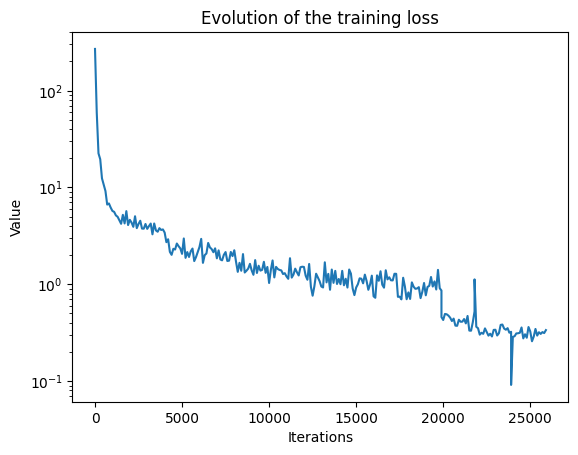

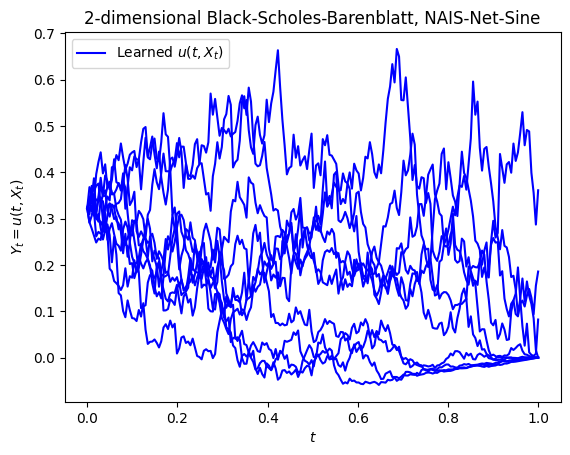

In [47]:
plt.figure()
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
samples = 10
plt.figure()
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')

plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()

plt.show()

In [48]:
Y_pred.shape

(8192, 202, 1)

In [49]:
r = 0.05

In [50]:
Y_preds = Y_pred.reshape(8192,202)

In [51]:
time_stamps = t_test[0].reshape(202,)
time_stamps

array([0.        , 0.00497512, 0.00995025, 0.01492537, 0.0199005 ,
       0.02487562, 0.02985075, 0.03482587, 0.03980099, 0.04477612,
       0.04975124, 0.05472637, 0.05970149, 0.06467662, 0.06965174,
       0.07462686, 0.07960199, 0.08457711, 0.08955224, 0.09452736,
       0.09950249, 0.10447761, 0.10945274, 0.11442786, 0.11940298,
       0.12437811, 0.12935324, 0.13432837, 0.13930348, 0.1442786 ,
       0.14925373, 0.15422885, 0.15920398, 0.1641791 , 0.16915423,
       0.17412935, 0.17910448, 0.1840796 , 0.18905473, 0.19402985,
       0.19900498, 0.2039801 , 0.20895523, 0.21393035, 0.21890548,
       0.2238806 , 0.22885571, 0.23383084, 0.23880596, 0.24378109,
       0.24875621, 0.25373134, 0.25870648, 0.2636816 , 0.26865673,
       0.27363184, 0.27860695, 0.2835821 , 0.2885572 , 0.29353234,
       0.29850745, 0.3034826 , 0.3084577 , 0.31343284, 0.31840795,
       0.3233831 , 0.3283582 , 0.33333334, 0.33830845, 0.3432836 ,
       0.3482587 , 0.35323384, 0.35820895, 0.3631841 , 0.36815

In [52]:
epe = np.mean(np.exp(-r*time_stamps) * np.maximum(Y_preds,0),axis=0)    
epe

array([0.32194448, 0.32200643, 0.32196525, 0.322324  , 0.32201946,
       0.32190531, 0.32198998, 0.32204565, 0.32159305, 0.32162994,
       0.32164347, 0.32166833, 0.3213122 , 0.32144603, 0.32096133,
       0.32122684, 0.32150555, 0.32137212, 0.32201448, 0.32207376,
       0.32127598, 0.32130915, 0.32126656, 0.321057  , 0.3211001 ,
       0.32068142, 0.32030565, 0.32057968, 0.32047477, 0.3202515 ,
       0.3210593 , 0.32129383, 0.32117847, 0.32102975, 0.32082337,
       0.3205633 , 0.3208348 , 0.32168314, 0.32194412, 0.32221553,
       0.32239756, 0.32272524, 0.32264864, 0.3227963 , 0.32300714,
       0.32296264, 0.32256106, 0.32308152, 0.32285717, 0.32269007,
       0.3227884 , 0.3228009 , 0.3234006 , 0.32318798, 0.32300884,
       0.32326865, 0.3231344 , 0.3237879 , 0.32340127, 0.3238003 ,
       0.32375485, 0.32369113, 0.32369268, 0.32390034, 0.32370818,
       0.32359096, 0.3239177 , 0.32408684, 0.32452422, 0.32469848,
       0.3247629 , 0.3248467 , 0.32569194, 0.3262001 , 0.32660

In [53]:
ene = np.mean(np.minimum(Y_preds,0),axis=0)
ene

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00, -1.7645891e-07, -5.5403564e-07,  0.0000000e+00,
       -3.2301623e-06, -2.5059289e-06, -1.0359771e-05, -1.5886135e-05,
       -3.1105934e-05, -4.2026357e-05, -4.9364164e-05, -6.3479230e-05,
       -8.9409703e-05, -1.0019830e-04, -1.2878439e-04, -1.5419516e-04,
       -2.1364911e-04, -2.4205045e-04, -2.7914922e-04, -3.5555358e-04,
       -3.9564801e-04, -4.5513126e-04, -5.0195964e-04, -5.7454570e-04,
       -6.4127252e-04, -6.9921295e-04, -7.2128361e-04, -8.0205890e-04,
       -8.5380534e-04, -9.1237260e-04, -1.0089535e-03, -1.0933717e-03,
       -1.1463361e-03, -1.2233483e-03, -1.2929210e-03, -1.3172439e-03,
       -1.4268786e-03, -1.4732322e-03, -1.5340892e-03, -1.6363078e-03,
       -1.7195125e-03, -1.8273802e-03, -1.8867227e-03, -1.9746139e-03,
       -1.9925297e-03, -2.0466980e-03, -2.1374726e-03, -2.2236723e-03,
      

In [59]:
import numpy as np

# Parameters
r = 0.05   # Risk-free rate
sigma1 = 0.40 # Volatility of asset 1
sigma2 = 0.40  # Volatility of asset 2
S1_0 = 1  # Initial price of asset 1
S2_0 = 1 # Initial price of asset 2
rho = 0.5  # Correlation coefficient
T = 1  # Time to maturity
N = 50  # Number of time steps
dt = T / N  # Size of each time step
M = 10000  # Number of Monte Carlo simulations

# Generate correlated Brownian motions
Z1 = np.random.normal(0, 1, (M, N))
Z2 = np.random.normal(0, 1, (M, N))
Z2 = rho * Z1 + np.sqrt(1 - rho**2) * Z2  # Correlating Z2 with Z1

# Simulate asset price paths
S1 = np.zeros((M, N + 1))
S2 = np.zeros((M, N + 1))
S1[:, 0] = S1_0
S2[:, 0] = S2_0

for t in range(1, N + 1):
    S1[:, t] = S1[:, t-1] * np.exp((r - 0.5 * sigma1**2) * dt + sigma1 * np.sqrt(dt) * Z1[:, t-1])
    S2[:, t] = S2[:, t-1] * np.exp((r - 0.5 * sigma2**2) * dt + sigma2 * np.sqrt(dt) * Z2[:, t-1])

# Calculate final payoff for each simulation
payoffs = (S1[:, -1] + S2[:, -1])
payoffs = np.maximum(payoffs - 2, 0)  # Basket option payoff

# Calculate the expected payoff and discount it back to present value
expected_payoff = np.mean(payoffs)
option_price = np.exp(-r * T) * expected_payoff

option_price


0.3232979632596235

In [60]:
epe_exact = np.array([option_price for s in time_stamps[1:]])
ene_exact = np.array([0.0 for s in time_stamps[1:]])

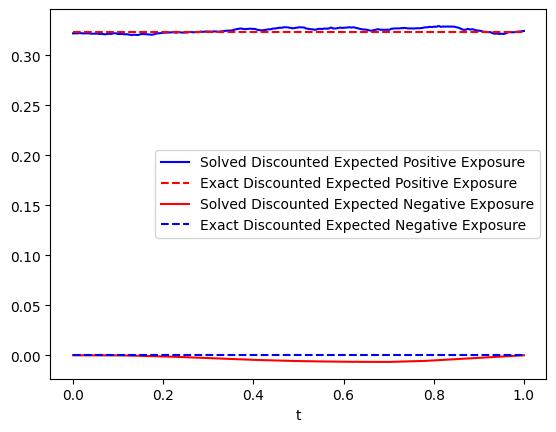

In [61]:
fig = plt.figure()
plt.plot(time_stamps,np.transpose(epe),'b',label='Solved Discounted Expected Positive Exposure' )
plt.plot(time_stamps,[option_price] + list(epe_exact),'r--',label='Exact Discounted Expected Positive Exposure')
plt.plot(time_stamps,np.transpose(ene),'r',label='Solved Discounted Expected Negative Exposure')
plt.plot(time_stamps,[0.0]+list(ene_exact),'b--',label='Exact Discounted Expected Negative Exposure')

plt.xlabel('t')
plt.legend()

plt.show()

In [62]:
model.save_model("models/2DCallOptionBasketCorrelated.pth")